In [525]:
# coding=utf8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [526]:
# 1. 获取数据
# 2. 基本数据处理
# 2.1 缺失值处理
# 2.2 确定特征值，目标值
# 2.3 分割数据
# 3. 特征工程（标准化）
# 4. 机器学习（逻辑回归）
# 5. 模型评估

In [527]:
import time

# 1. 获取数据
df = pd.read_csv('data/交易明细.csv',
                 sep=',',
                 # index_col=['时间'],  # 设置行索引
                 parse_dates=['时间'],  # 解析时间 2017/8/16 18:10
                 date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d %H:%M'),  # 时间解析的格式
                 usecols=['时间', '方向', '开仓均价', '平仓价格', '盈亏', '类别'],
                 encoding='gbk',
                 )
print(df.dtypes)
df

时间      datetime64[ns]
方向               int64
开仓均价             int64
平仓价格             int64
盈亏               int64
类别               int64
dtype: object


,时间,方向,开仓均价,平仓价格,盈亏,类别
0,2017-08-16 18:10:00,-1,1723,1726,-30,0
1,2017-08-18 13:30:00,1,1726,1732,60,1
2,2017-08-18 13:50:00,-1,1732,1735,-30,0
3,2017-08-18 14:00:00,1,1735,1732,-30,0
4,2017-08-21 13:25:00,-1,1732,1734,-20,0
...,...,...,...,...,...,...
495,2018-12-13 13:10:00,1,1868,1869,10,1
496,2018-12-13 13:25:00,-1,1869,1872,-30,0
497,2018-12-13 14:05:00,1,1872,1870,-20,0
498,2018-12-13 14:45:00,-1,1870,1871,-10,0


In [528]:
# 时间格式转换，方便数据标准化
#df['时间'] = df['时间'].apply(lambda x:time.mktime(x.timetuple()))
#df.dtypes

In [529]:
# 将索引转换成列
df['id'] = df.index
df['下次类别'] = df['类别'].shift(-1)  #读取下一次类别
df = df[['id', '平仓价格', '盈亏', '下次类别']]
df

,id,平仓价格,盈亏,下次类别
0,0,1726,-30,1.0
1,1,1732,60,0.0
2,2,1735,-30,0.0
3,3,1732,-30,0.0
4,4,1734,-20,0.0
...,...,...,...,...
495,495,1869,10,0.0
496,496,1872,-30,0.0
497,497,1870,-20,0.0
498,498,1871,-10,0.0


In [530]:
# 2.1 缺失值处理

# 检查数据中是否有缺失值，以下两种方式均可
#Flase:对应特征的特征值中无缺失值
#True：有缺失值
print(df.isnull().any())
print(np.isnan(df).any())

id      False
平仓价格    False
盈亏      False
下次类别     True
dtype: bool
id      False
平仓价格    False
盈亏      False
下次类别     True
dtype: bool


In [531]:
#返回每一列缺失值统计个数
df.isnull().sum()

id      0
平仓价格    0
盈亏      0
下次类别    1
dtype: int64

In [532]:
#缺失值处理，以下两种方式均可
#删除包含缺失值的行
df.dropna(inplace=True)
#缺失值填充
# df.fillna('100')

#返回每一列缺失值统计个数
df.isnull().sum()

C:\ProgramData\Anaconda3\envs\py39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


id      0
平仓价格    0
盈亏      0
下次类别    0
dtype: int64

In [533]:
# 2.2 确定特征值，目标值

# 特征值
X = df.loc[0:, ['平仓价格', '盈亏']]
print(X.head(3))
print(X.shape)
print(X.ndim)

# 目标值
y = df.loc[0:, ['下次类别']]
print(y.head(3))
print(y.shape)
print(y.ndim)

print(type(df.values))  # 通过values方法，实现dataframe转换为ndarray

X = X.values
y = y.values

y = y.reshape(-1)  # 将二维转换成一维数组
print(y.shape)
print(y.ndim)


   平仓价格  盈亏
0  1726 -30
1  1732  60
2  1735 -30
(499, 2)
2
   下次类别
0   1.0
1   0.0
2   0.0
(499, 1)
2
<class 'numpy.ndarray'>
(499,)
1


In [569]:
# print(df.describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      499 non-null    int64  
 1   平仓价格    499 non-null    int64  
 2   盈亏      499 non-null    int64  
 3   下次类别    499 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 35.7 KB


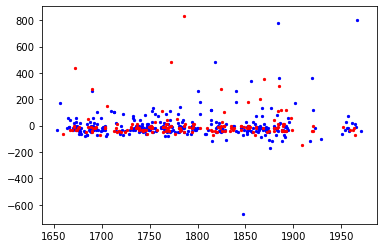

In [535]:
#画图
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=5, c='blue')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=5, color='red')
plt.show()

In [564]:
print(df.head(3))

   id  平仓价格  盈亏  下次类别
0   0  1726 -30   1.0
1   1  1732  60   0.0
2   2  1735 -30   0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      499 non-null    int64  
 1   平仓价格    499 non-null    int64  
 2   盈亏      499 non-null    int64  
 3   下次类别    499 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 35.7 KB


In [609]:
# 2.3 分割数据

#因为是时间序列值，不能用随机分割
# 前200组数据用于特征训练
x_train0, x_test0 = np.split(X, [300], axis=0)
y_train, y_test = np.split(y, [300], axis=0)

In [538]:
# 3. 特征工程（标准化）
from sklearn.preprocessing import StandardScaler

standarScaler = StandardScaler()

x_train = standarScaler.fit_transform(x_train0)
x_test = standarScaler.transform(x_test0)

# standarScaler.fit(X)
# x_train = standarScaler.transform(X)
# y_train = y

In [ ]:
# 定义机器学习算法的决策边界输出函数
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-3, 3),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-3, 3)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


In [559]:
from sklearn.svm import LinearSVC

# 用训练集训练模型
# 4. 机器学习（支持向量分类）
svc = LinearSVC(C=0.1)
svc.fit(x_train, y_train)

LinearSVC(C=0.1)

In [623]:
# 5. 模型评估
y_pre = svc.predict(x_test)
print("预测值：\n", y_pre)
score = svc.score(x_test, y_test)
print("准确率是：\n", score)
print(type(y_pre))
print(y_pre.ndim)
print(y_pre.shape)

预测值：
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
准确率是：
 0.6432160804020101
<class 'numpy.ndarray'>
1
(199,)


In [624]:
# 把一维数组，变成二维数组，(-1, 1)多行两列
y_pre2 = np.reshape(y_pre, (-1, 1))
y_test2= np.reshape(y_test, (-1, 1))

look = np.concatenate([y_pre2, y_test2], axis=1)
# 把未特征处理的测试集，两列数组添加到look数组后面，方便查看
# look = np.concatenate([y_pre2, y_test2, x_test0], axis=1)
print(type(look))
print(look.ndim)
print(look.shape)
# look

<class 'numpy.ndarray'>
2
(199, 2)


C:\Users\yalin\AppData\Local\Temp/ipykernel_22152/3298936273.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


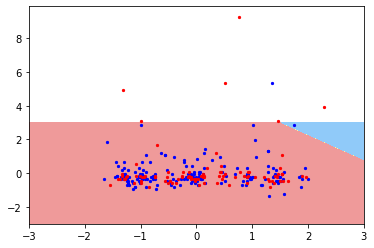

In [621]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], s=5, c='blue')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], s=5, c='red')
plt.show()